In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import pandas as pd
import configs
from scipy.optimize import curve_fit

# Arguments

In [2]:
corr = 0.25

# Load Meta-RL results

In [3]:
#model_name, path_to_pkl, eval_dset_path = configs.get_model_paths(corr, "tree_maze_big_pretraining")
model_name, path_to_pkl, eval_dset_path = configs.get_model_paths(corr, "tree_maze")

epoch=35-val_loss=0.000347.ckpt


In [4]:
path_to_pkl = os.path.join(os.path.dirname(path_to_pkl), 'eval_results_offline_by_query_type.pkl')

In [5]:
with open(path_to_pkl, "rb") as f:
    data = pickle.load(f)
metarl_df = pd.DataFrame(data)
metarl_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/n/holylfs06/LABS/krajan_lab/Lab/cfang/icl-maze/tree_maze/cntree_layers7_bprob0.9_corr0.25_state_dim10_envs300000_H800_explore/models/transformer_end_query_embd512_layer3_head4_lr0.0001_drop0.2_initseed1_batch512/eval_results_offline_by_query_type.pkl'

# Load DQN results

In [6]:
engram_dir = "/n/holylfs06/LABS/krajan_lab/Lab/cfang/icl-maze/"
wandb_project = "tree_maze_qlearning"
env_name = f"cntree_layers7_bprob1.0_corr{corr}_state_dim10_envs1000_H1600_explore"
model_name = "dqn_nlayers4_gamma0.9_target10_lr1e-05_temp0.01"
path_to_pkl = os.path.join(
    engram_dir, wandb_project, env_name, "models", model_name,
    "eval_results_offline_by_query_type.pkl")

In [7]:
with open(path_to_pkl, "rb") as f:
    data = pickle.load(f)
dqn_df = pd.DataFrame(data)
dqn_df = dqn_df.rename(columns={'returns': 'return'})
dqn_df['model'] = 'DQN'
opt_return = 389.1792
dqn_df['path_length_scaled'] = (opt_return - dqn_df['return'])/opt_return
dqn_df['returns_scaled'] = dqn_df['return']/opt_return
dqn_df.head()

,return,environment,experienced_reward,context_length,query_type,model,path_length_scaled,returns_scaled
0,0.00,0,8,1000,seen_states_pre_reward,DQN,1.000000,0.000000
1,0.00,0,8,1000,seen_states_post_reward,DQN,1.000000,0.000000
2,0.00,0,8,1000,unseen_states,DQN,1.000000,0.000000
3,334.25,1,29,1000,seen_states_pre_reward,DQN,0.141141,0.858859
4,395.00,1,29,1000,seen_states_post_reward,DQN,-0.014957,1.014957


# Load Q table results

In [8]:
engram_dir = "/n/holylfs06/LABS/krajan_lab/Lab/cfang/icl-maze/"
wandb_project = "tree_maze_qlearning"
env_name = f"cntree_layers7_bprob1.0_corr{corr}_state_dim10_envs1000_H1600_explore"
model_name = "q_table_gamma0.85_temp0.01"
path_to_pkl = os.path.join(
    engram_dir, wandb_project, env_name, "models", model_name,
    "eval_results_offline_by_query_type.pkl")

In [9]:
with open(path_to_pkl, "rb") as f:
    data = pickle.load(f)
qtable_df = pd.DataFrame(data)
qtable_df = qtable_df.rename(columns={'returns': 'return'})
qtable_df['model'] = 'Q Table'
opt_return = 389.1792
qtable_df['path_length_scaled'] = (opt_return - qtable_df['return'])/opt_return
qtable_df['returns_scaled'] = qtable_df['return']/opt_return
qtable_df.head()

,return,environment,experienced_reward,context_length,query_type,model,path_length_scaled,returns_scaled
0,390.85,0,8,1000,seen_states_pre_reward,Q Table,-0.004293,1.004293
1,391.75,0,8,1000,seen_states_post_reward,Q Table,-0.006606,1.006606
2,243.05,0,8,1000,unseen_states,Q Table,0.375480,0.624520
3,393.15,1,29,1000,seen_states_pre_reward,Q Table,-0.010203,1.010203
4,395.00,1,29,1000,seen_states_post_reward,Q Table,-0.014957,1.014957


# Plot all results

In [10]:
# Concatenate the dataframes
df = pd.concat([metarl_df, dqn_df, qtable_df], ignore_index=True)


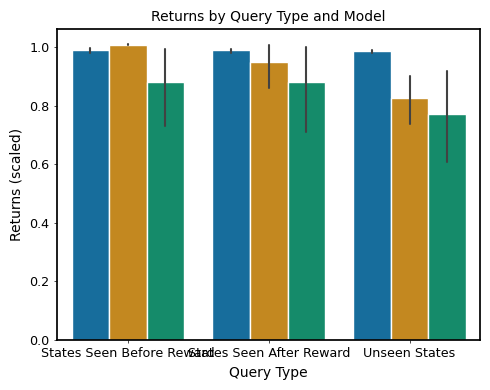

In [12]:
# Create bar plot
plt.figure(figsize=(5,4))
sns.barplot(
    data=df, x='query_type', y='returns_scaled', hue='model',
    hue_order=['Learner (temp=2)', 'Q Table', 'DQN'],
    legend=None)
plt.xticks([0,1,2], ["States Seen Before Reward", "States Seen After Reward", "Unseen States"])
plt.xlabel('Query Type')
plt.ylabel('Returns (scaled)')
plt.title('Returns by Query Type and Model')
plt.tight_layout()
plt.show()
